In [0]:
#overfitting occurs when the model has learn too well on the training data, causing the model to learn specific patterns of the data that may not generalize well to
#data that is hasnt seen before. This means that our model is too complex. Underfitting is when our model hasnt learned all the patterns of the data and that we
#can still develop a better model to characterize the patterns in the data. This means our model is too simple. The best way to combat overfitting is to get more 
#data. Models that are trained with more data tends to generalize better because it gets to see more variations of specific observation. When this is not possible,
#model regularization should be use. By doing this, we force the model to only learn general patterns of the data and not specific details of it.

# This notebook will focus on using two techniques to regularize the model, regularization and dropout on the IMDB movie dataset.

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0-rc2


In [0]:
num_words = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = num_words)

def multi_hot_sequences(sequences, dimensions):
  #setting the results to be a matrix of all zeroes with specific dimensions
  results = np.zeros((len(sequences), dimensions))
  
  #setting each word to be 1 if the word is in the observation
  for idx, word_indices in enumerate(sequences):
    results[idx, word_indices] = 1.0
  
  return results

In [0]:
train_data = multi_hot_sequences(train_data, dimensions = num_words)
test_data = multi_hot_sequences(test_data, dimensions = num_words)

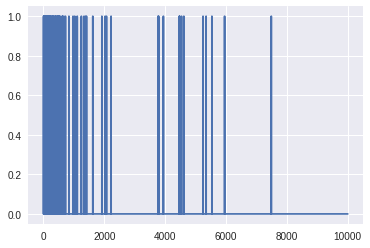

In [12]:
plt.plot(train_data[0])

In [0]:
#the simplest way to prevent overfitting is to reduce the size of the model, (i.e) the learning parameters in the model (which means to reduce the number of
#layers and units in the layer for DL)
#Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

In [14]:
#baseline model

base_model = tf.keras.Sequential()

base_model.add(tf.keras.layers.Dense(16, activation = 'relu', input_shape=(10000,)))
base_model.add(tf.keras.layers.Dense(16, activation = 'relu'))
base_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

base_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])

base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
base_history = base_model.fit(train_data, train_labels, verbose = 2, epochs = 20, batch_size = 512, validation_data = (test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.4742 - acc: 0.8135 - binary_crossentropy: 0.4742 - val_loss: 0.3375 - val_acc: 0.8732 - val_binary_crossentropy: 0.3375
Epoch 2/20
 - 3s - loss: 0.2530 - acc: 0.9091 - binary_crossentropy: 0.2530 - val_loss: 0.2856 - val_acc: 0.8867 - val_binary_crossentropy: 0.2856
Epoch 3/20
 - 3s - loss: 0.1885 - acc: 0.9341 - binary_crossentropy: 0.1885 - val_loss: 0.2866 - val_acc: 0.8863 - val_binary_crossentropy: 0.2866
Epoch 4/20
 - 3s - loss: 0.1522 - acc: 0.9478 - binary_crossentropy: 0.1522 - val_loss: 0.3066 - val_acc: 0.8811 - val_binary_crossentropy: 0.3066
Epoch 5/20
 - 3s - loss: 0.1270 - acc: 0.9583 - binary_crossentropy: 0.1270 - val_loss: 0.3310 - val_acc: 0.8752 - val_binary_crossentropy: 0.3310
Epoch 6/20
 - 3s - loss: 0.1070 - acc: 0.9658 - binary_crossentropy: 0.1070 - val_loss: 0.3571 - val_acc: 0.8718 - val_binary_crossentropy: 0.3571
Epoch 7/20
 - 3s - loss: 0.0908 - acc: 0.9722 - binary_crossentropy:

In [16]:
#create a smaller model since the base model has overfitted

small_model = tf.keras.Sequential()

small_model.add(tf.keras.layers.Dense(4, activation = 'relu', input_shape = (10000,)))
small_model.add(tf.keras.layers.Dense(4, activation = 'relu'))
small_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

#compiling the model
small_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])

small_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [17]:
small_history = small_model.fit(train_data, train_labels, verbose = 2, epochs = 20, batch_size = 512, validation_data = (test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6158 - acc: 0.6455 - binary_crossentropy: 0.6158 - val_loss: 0.5513 - val_acc: 0.7658 - val_binary_crossentropy: 0.5513
Epoch 2/20
 - 3s - loss: 0.5014 - acc: 0.8286 - binary_crossentropy: 0.5014 - val_loss: 0.4933 - val_acc: 0.8478 - val_binary_crossentropy: 0.4933
Epoch 3/20
 - 3s - loss: 0.4476 - acc: 0.8861 - binary_crossentropy: 0.4476 - val_loss: 0.4650 - val_acc: 0.8618 - val_binary_crossentropy: 0.4650
Epoch 4/20
 - 3s - loss: 0.4115 - acc: 0.9122 - binary_crossentropy: 0.4115 - val_loss: 0.4491 - val_acc: 0.8691 - val_binary_crossentropy: 0.4491
Epoch 5/20
 - 3s - loss: 0.3833 - acc: 0.9306 - binary_crossentropy: 0.3833 - val_loss: 0.4446 - val_acc: 0.8620 - val_binary_crossentropy: 0.4446
Epoch 6/20
 - 3s - loss: 0.3594 - acc: 0.9438 - binary_crossentropy: 0.3594 - val_loss: 0.4369 - val_acc: 0.8692 - val_binary_crossentropy: 0.4369
Epoch 7/20
 - 3s - loss: 0.3386 - acc: 0.9538 - binary_crossentropy:

In [19]:
big_model = tf.keras.Sequential()

big_model.add(tf.keras.layers.Dense(512, activation = 'relu', input_shape = (10000,)))
big_model.add(tf.keras.layers.Dense(512, activation = 'relu'))
big_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

big_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])

big_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [21]:
big_history = big_model.fit(train_data, train_labels, verbose = 2, epochs = 20, batch_size = 512, validation_data = (test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 17s - loss: 0.3465 - acc: 0.8498 - binary_crossentropy: 0.3465 - val_loss: 0.2965 - val_acc: 0.8801 - val_binary_crossentropy: 0.2965
Epoch 2/20
 - 17s - loss: 0.1386 - acc: 0.9498 - binary_crossentropy: 0.1386 - val_loss: 0.3518 - val_acc: 0.8663 - val_binary_crossentropy: 0.3518
Epoch 3/20
 - 17s - loss: 0.0459 - acc: 0.9874 - binary_crossentropy: 0.0459 - val_loss: 0.4262 - val_acc: 0.8682 - val_binary_crossentropy: 0.4262
Epoch 4/20
 - 17s - loss: 0.0074 - acc: 0.9990 - binary_crossentropy: 0.0074 - val_loss: 0.5816 - val_acc: 0.8693 - val_binary_crossentropy: 0.5816
Epoch 5/20
 - 17s - loss: 7.8533e-04 - acc: 1.0000 - binary_crossentropy: 7.8533e-04 - val_loss: 0.6616 - val_acc: 0.8704 - val_binary_crossentropy: 0.6616
Epoch 6/20
 - 18s - loss: 2.6511e-04 - acc: 1.0000 - binary_crossentropy: 2.6511e-04 - val_loss: 0.7000 - val_acc: 0.8702 - val_binary_crossentropy: 0.7000
Epoch 7/20
 - 17s - loss: 1.6217e-04 - acc: 1.

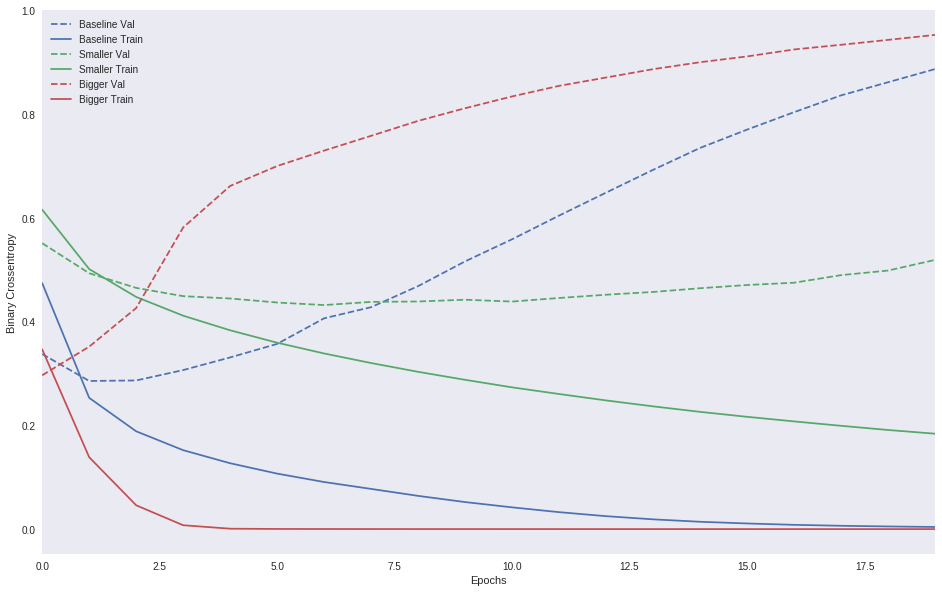

In [24]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  
  plt.grid(False)

plot_history([('baseline', base_history),
              ('smaller', small_history),
              ('bigger', big_history)])

In [26]:
#strategies to combat overfitting
#weight regularization

l2_model = tf.keras.Sequential()
l2_model.add(tf.keras.layers.Dense(16, activation = 'relu', input_shape = (10000,), kernel_regularizer = tf.keras.regularizers.l2(0.001)))
l2_model.add(tf.keras.layers.Dense(16, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)))
l2_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

l2_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5040 - acc: 0.8196 - binary_crossentropy: 0.4616 - val_loss: 0.3656 - val_acc: 0.8778 - val_binary_crossentropy: 0.3226
Epoch 2/20
 - 3s - loss: 0.2910 - acc: 0.9126 - binary_crossentropy: 0.2446 - val_loss: 0.3333 - val_acc: 0.8862 - val_binary_crossentropy: 0.2844
Epoch 3/20
 - 3s - loss: 0.2441 - acc: 0.9327 - binary_crossentropy: 0.1931 - val_loss: 0.3385 - val_acc: 0.8845 - val_binary_crossentropy: 0.2857
Epoch 4/20
 - 3s - loss: 0.2202 - acc: 0.9438 - binary_crossentropy: 0.1659 - val_loss: 0.3538 - val_acc: 0.8812 - val_binary_crossentropy: 0.2985
Epoch 5/20
 - 3s - loss: 0.2079 - acc: 0.9491 - binary_crossentropy: 0.1510 - val_loss: 0.3665 - val_acc: 0.8782 - val_binary_crossentropy: 0.3087
Epoch 6/20
 - 3s - loss: 0.1947 - acc: 0.9543 - binary_crossentropy: 0.1363 - val_loss: 0.3832 - val_acc: 0.8746 - val_binary_crossentropy: 0.3243
Epoch 7/20
 - 3s - loss: 0.1878 - acc: 0.9579 - binary_crossentropy:

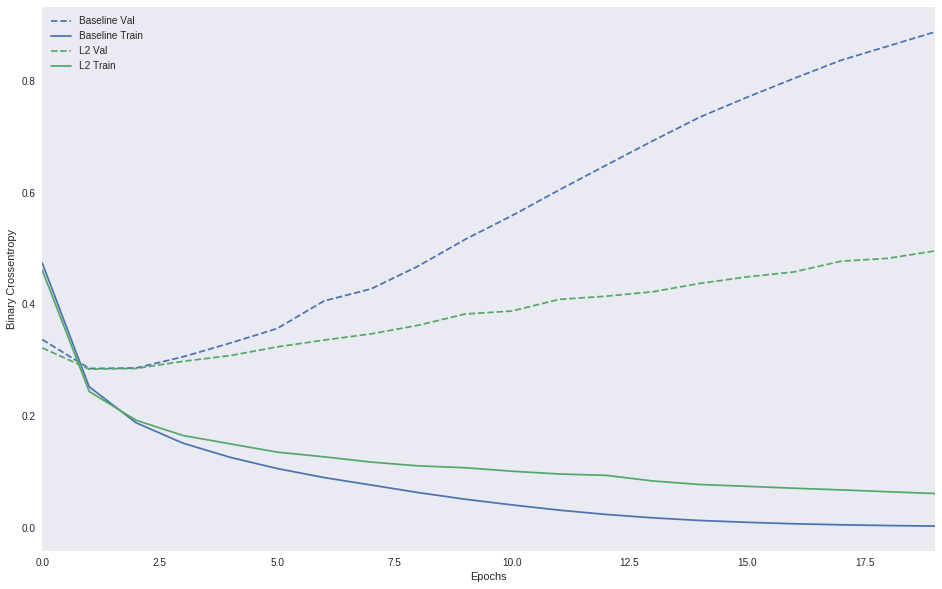

In [28]:
plot_history([('baseline', base_history),
              ('l2', l2_model_history)])

In [29]:
#dropout model
dpt_model = tf.keras.Sequential()

dpt_model.add(tf.keras.layers.Dense(16, activation = 'relu', input_shape = (10000,)))
dpt_model.add(tf.keras.layers.Dropout(.5))
dpt_model.add(tf.keras.layers.Dense(16, activation = 'relu'))
dpt_model.add(tf.keras.layers.Dropout(.5))
dpt_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6295 - acc: 0.6342 - binary_crossentropy: 0.6295 - val_loss: 0.5000 - val_acc: 0.8388 - val_binary_crossentropy: 0.5000
Epoch 2/20
 - 3s - loss: 0.4622 - acc: 0.8032 - binary_crossentropy: 0.4622 - val_loss: 0.3433 - val_acc: 0.8812 - val_binary_crossentropy: 0.3433
Epoch 3/20
 - 3s - loss: 0.3490 - acc: 0.8658 - binary_crossentropy: 0.3490 - val_loss: 0.2881 - val_acc: 0.8875 - val_binary_crossentropy: 0.2881
Epoch 4/20
 - 3s - loss: 0.2817 - acc: 0.8953 - binary_crossentropy: 0.2817 - val_loss: 0.2745 - val_acc: 0.8884 - val_binary_crossentropy: 0.2745
Epoch 5/20
 - 3s - loss: 0.2414 - acc: 0.9113 - binary_crossentropy: 0.2414 - val_loss: 0.2758 - val_acc: 0.8876 - val_binary_crossentropy: 0.2758
Epoch 6/20
 - 3s - loss: 0.2126 - acc: 0.9277 - binary_crossentropy: 0.2126 - val_loss: 0.2899 - val_acc: 0.8859 - val_binary_crossentropy: 0.2899
Epoch 7/20
 - 3s - loss: 0.1886 - acc: 0.9368 - binary_crossentropy:

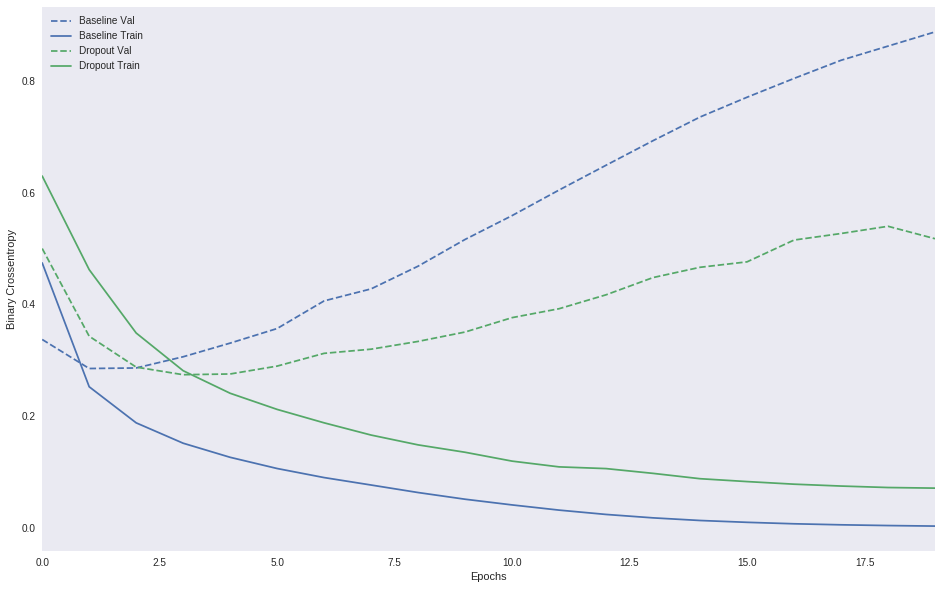

In [30]:
plot_history([('baseline', base_history),
              ('dropout', dpt_model_history)])